In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("D:/COURSES/Python for Machine Learning & Data Science Masterclass/1 - Introduction to Course/DATA/hearing_test.csv")

In [7]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [8]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


<Axes: xlabel='test_result', ylabel='age'>

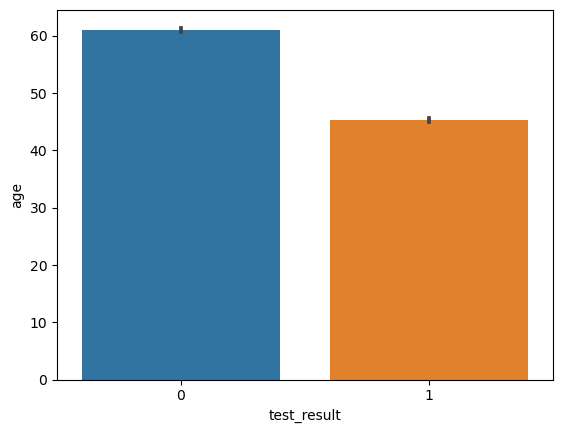

In [10]:
sns.barplot(data=df,y='age',x='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

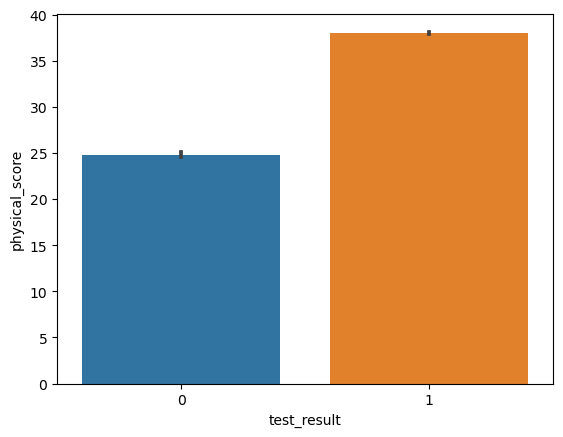

In [11]:
sns.barplot(data=df,y='physical_score',x='test_result')

<Axes: xlabel='test_result', ylabel='count'>

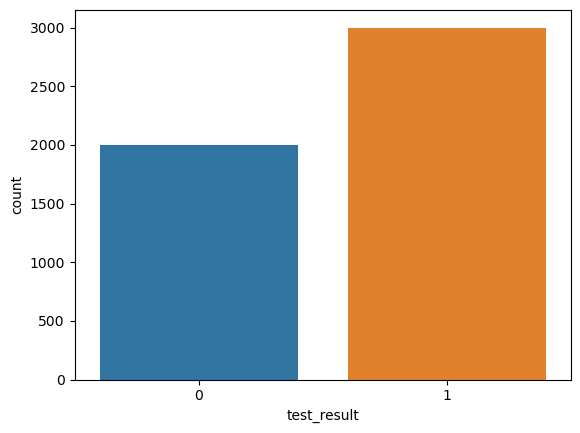

In [12]:
sns.countplot(x=df['test_result'])

<Axes: xlabel='test_result', ylabel='age'>

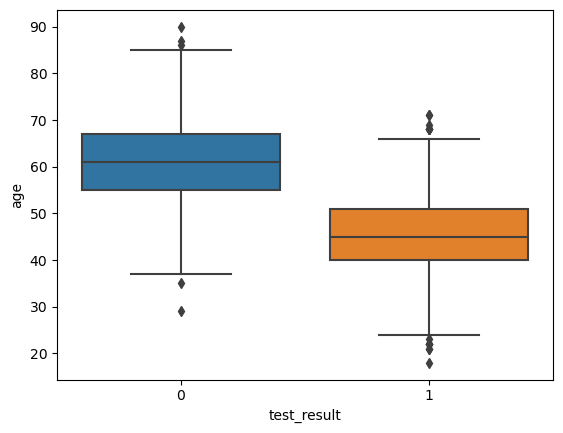

In [13]:
sns.boxplot(data=df,x='test_result',y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

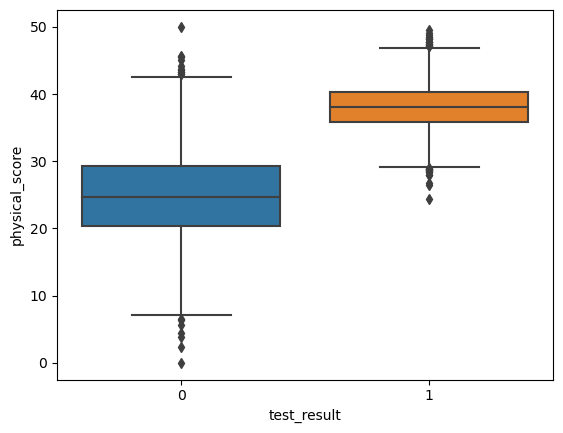

In [14]:
sns.boxplot(data=df,x='test_result',y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

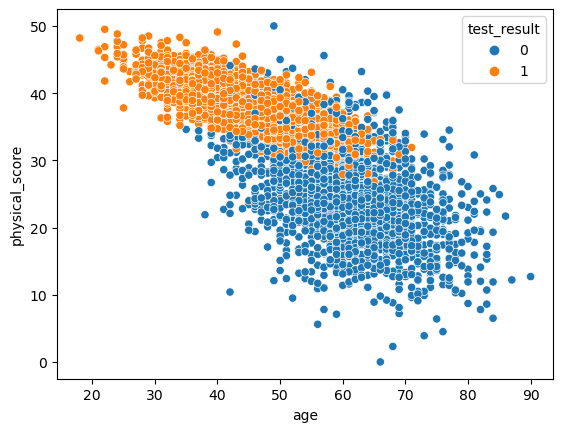

In [15]:
sns.scatterplot(data=df,y='physical_score',x='age',hue="test_result")

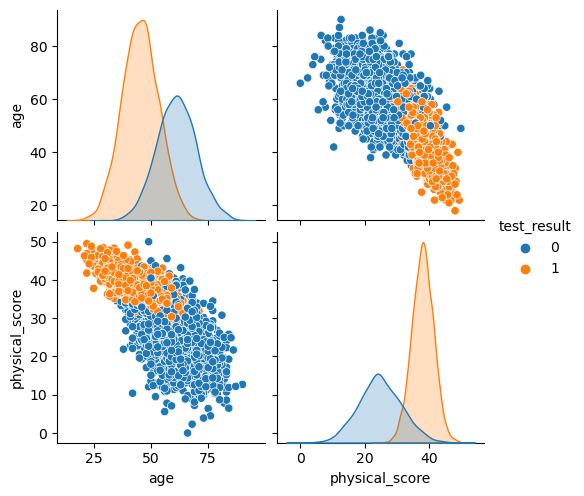

In [16]:
sns.pairplot(data=df,hue='test_result')

<Axes: >

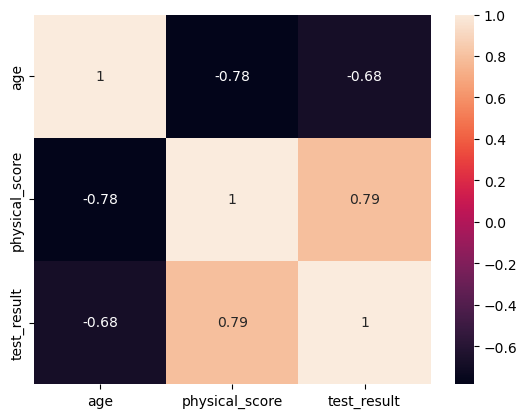

In [17]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

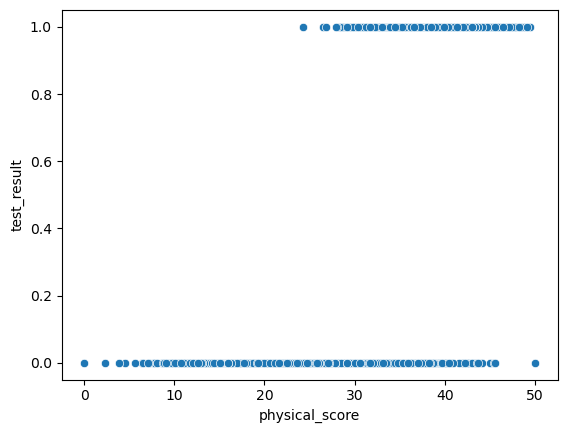

In [18]:
sns.scatterplot(df,x='physical_score',y="test_result")

In [19]:
from mpl_toolkits import mplot3d


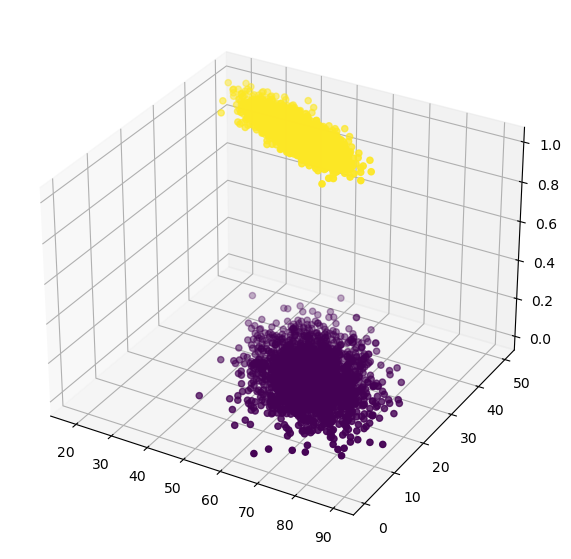

In [20]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df['age'], df['physical_score'], df['test_result'], c =df['test_result'])
 
# show plot
plt.show()

## Training the model with simple logistic regression

In [21]:
X=df.drop('test_result',axis=1)

In [22]:
y=df['test_result']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [26]:
scaler=StandardScaler()

In [27]:
scaled_X_train=scaler.fit_transform(X_train)

In [28]:
scaled_X_test=scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model=LogisticRegression()

In [31]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [32]:
test_pred=log_model.predict(scaled_X_test)

In [33]:
log_model.predict_proba(scaled_X_test) #probability prediction whether it is 0 or 1

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [34]:
 from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
accuracy_score(y_test,test_pred)

0.93

In [36]:
confusion_matrix(y_test,test_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [37]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [38]:
 from sklearn.metrics import precision_score,recall_score

In [39]:
precision=precision_score(y_test,test_pred)
precision

0.9331210191082803

In [40]:
recall=recall_score(y_test,test_pred)
recall

0.9543973941368078

In [41]:
 from sklearn.metrics import ConfusionMatrixDisplay

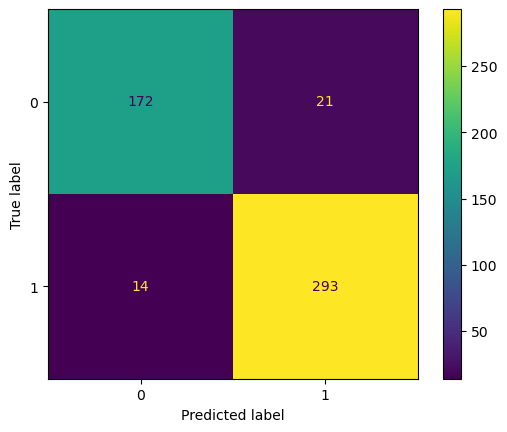

In [42]:
cm=confusion_matrix(y_test,test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [43]:
 from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay,precision_recall_curve,roc_curve,auc

In [61]:
def display_precision_recall_curve(log_model):
    test_prob=log_model.predict_proba(scaled_X_test)[::,1] #probability prediction whether it is 0 or 1
    precision, recall, _= precision_recall_curve(y_test,  test_prob)

    plt.plot(precision,recall)
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

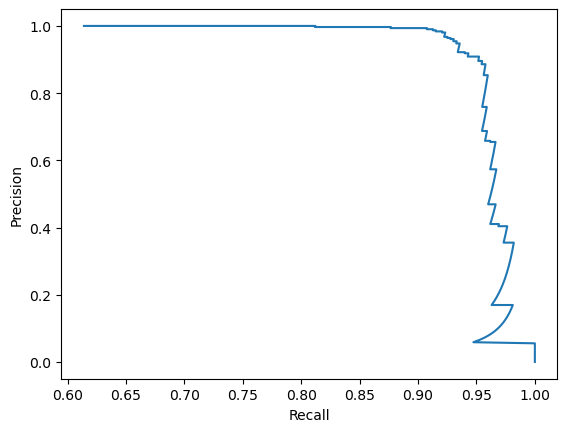

In [62]:
display_precision_recall_curve(log_model)

In [52]:
def display_roc_curve(log_model):
    test_prob=log_model.predict_proba(scaled_X_test)[::,1] #probability prediction whether it is 0 or 1
    fpr, tpr, _ = roc_curve(y_test,  test_prob)

    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

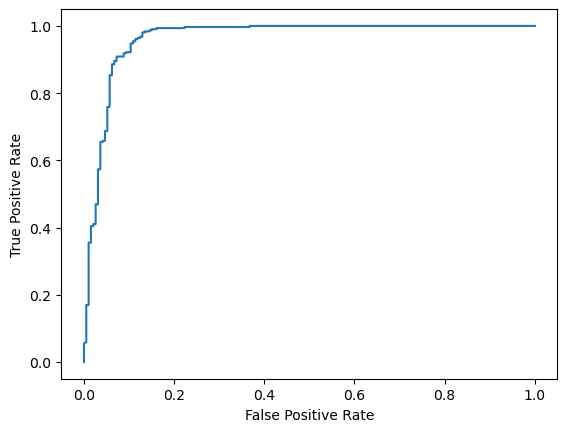

In [55]:
display_roc_curve(log_model)